<h1 style="border: 2px solid cyan; border-radius: 8px; padding: 8px; text-align: center;"> Exploratory Data Analysis and Visualization Showcase </h1>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1| Data Selection


- Dataset Name: Algerian Forest Fires Dataset
- Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- Brief Description: The Algerian forest fires dataset consists of 244 instances, with 122 instances for each of the two regions: Bejaia and Sidi Bel-abbes. The dataset covers a period from June 2012 to September 2012.


### Variable Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


## 2| Data Loading and Transformation


- Note: I manually restructured the `Algerian_forest_fires_dataset_UPDATE.csv` file for better usability.

In [2]:
df = pd.read_csv(
    "./algerian+forest+fires+dataset/Algerian_forest_fires.csv",
    index_col=["day", "month", "year"],
)
bejaia_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Bejaia Region Dataset.csv",
    index_col=["day", "month", "year"],
)
sidi_bel_abbes_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset.csv",
    index_col=["day", "month", "year"],
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 244 entries, (1, 6, 2012) to (30, 9, 2012)
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    object 
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    object 
 10  Classes      243 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 23.4+ KB


- Since there is only one row with a missing value, we can safely replace that value with the last valid observation without significantly impacting the results.


In [4]:
df.fillna(method="ffill", inplace=True)

In [5]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


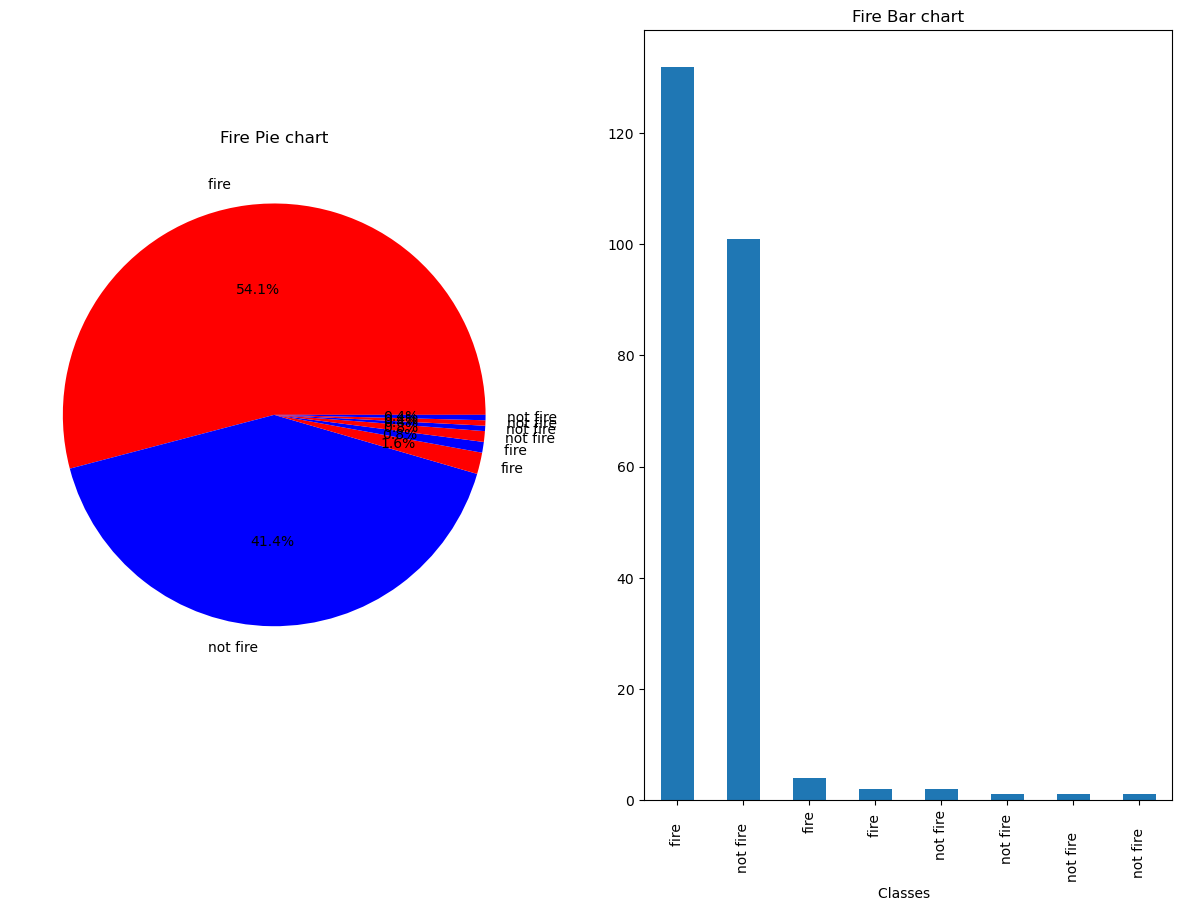

In [20]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,10)

fire_counts = df["Classes  "].value_counts()
ax[0].pie(fire_counts, labels=fire_counts.index, autopct="%.1f%%", colors=["red", "blue"])
ax[0].set_title("Fire Pie chart")

ax[1] = fire_counts.plot.bar()
ax[1].set_title("Fire Bar chart")


plt.show()

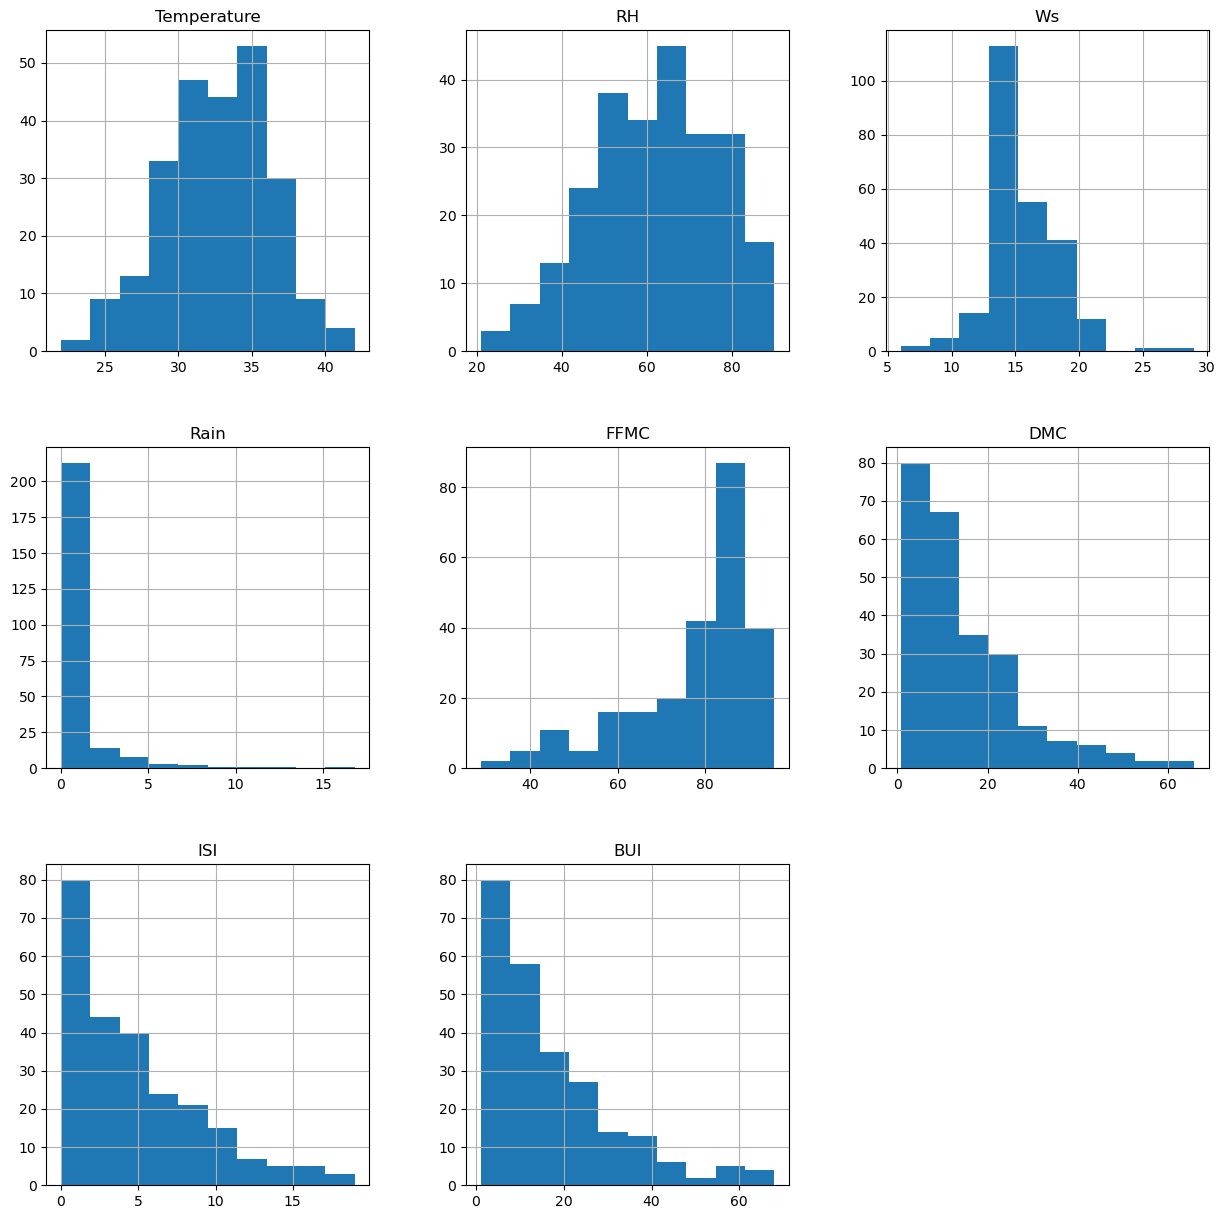

In [ ]:
df_hist = df.hist(figsize=(15,15))

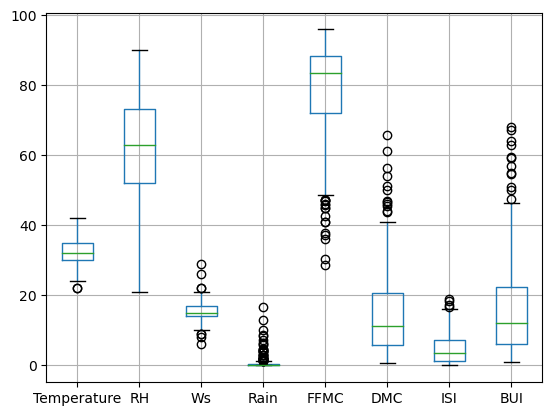

In [ ]:
axes, df_bp = df.boxplot(return_type="both")

In [ ]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')